In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [3]:
data['MEDV'] = boston.target

In [4]:
data = data[data['MEDV'] != 50]
X = data[["RM"]]
y = data["MEDV"]

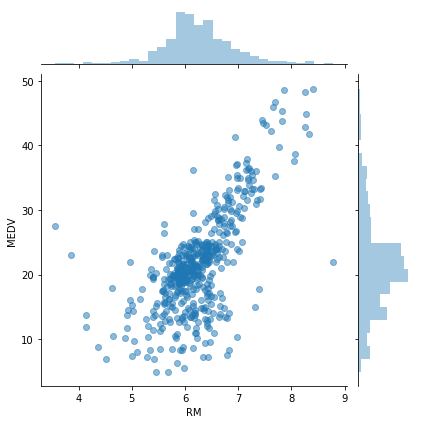

In [67]:
sns.jointplot(data["RM"], data["MEDV"], kind='scatter', joint_kws={'alpha':0.5});

In [6]:
class GDRegressor:
    
    def __init__(self, alpha=0.01, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X_train, y_train):
        if type(X_train) == list:
            pass
        else:
            X_train = X_train.values.tolist()

        if type(y_train) == list:
            pass
        else:
            y_train = y_train.values.tolist()

        X_matrix = []
        for i in range(len(X_train)):
            X_train[i].insert(0, 1)
            X_matrix.append(X_train[i])
        X_as_matrix = np.asmatrix(X_matrix)

        y_matrix = []
        for i in range(len(y_train)):
            y_matrix.append([y_train[i]])

        m = len(y_train)
        self.theta = np.zeros((len(X_matrix[0]), 1))

        for i in range(self.n_iter):
            self.theta = self.theta - self.alpha * (1 / m) * (np.matmul(X_as_matrix.T, 
                (np.matmul(X_matrix, self.theta) - y_matrix)))

        theta_list = np.matrix.tolist(self.theta)
        self.coef_ = theta_list[1:]
        self.intercept_ = theta_list[0]
        return theta_list
    
    def predict(self, X_test):
        if type(X_test) == list:
            pass
        else:
            X_test = X_test.values.tolist()
        X_matrix_test = []
        for i in range(len(X_test)):
            X_test[i].insert(0, 1)
            X_matrix_test.append(X_test[i])
        answers = np.matmul(X_matrix_test, self.theta)
        return answers
    

In [7]:
def rmse(y_hat, y):
    """ Root mean squared error """
    if type(y) == list:
        pass
    else:
        y = y.values.tolist()
    m = len(y)
    sum = 0
    for i in range(m):
        sum += ((y_hat[i] - y[i]) ** 2 / m)
    error = np.sqrt(sum)
    return error

In [8]:
def r_squared(y_hat, y):
    """ R-squared score """
    if type(y) == list:
        pass
    else:
        y = y.values.tolist()
    m = len(y)
    y_avg = np.average(y)
    
    a = b = 0
    for i in range(m):
        a += (y[i] - y_hat[i]) ** 2
        b += (y[i] - y_avg) ** 2
    error = 1 - a/b
    return error

In [23]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()

In [9]:
def plot_cost_function(X, y, estimator=None, max_iters=100, eta0=0.01, params=None, normalize=False):
    if estimator is SGDRegressor:
        if not params:
            params = {
                'loss': 'squared_loss',
                'penalty': 'none',
                'learning_rate': 'constant',
            }
        else:
            params.update(params)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
    
    if normalize:
        X_train = StandardScaler().fit_transform(X_train)
        Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
        X_test = StandardScaler().fit_transform(X_test)
        Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))
    
    cost_history = []
    for it in range(5, max_iters, round(max_iters * 0.01)):
        if estimator is SGDRegressor:
            model = estimator(max_iter=it, eta0=eta0, **params)
        else:
            model = estimator(n_iter=it, alpha=eta0)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        cost_history.append([it, mse])
    
    iterations, errors = list(zip(*cost_history))
    plt.plot(iterations, errors, '-')
    plt.xlabel("#Iteration")
    plt.ylabel("MSE")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [11]:
model = GDRegressor(alpha=0.03, n_iter=4000)

In [13]:
model.fit(X_train, y_train)

[[-18.187522977160786], [6.359696280643314]]

In [14]:
answers = model.predict(X_test)

In [16]:
rmse = rmse(answers, y_test)

In [17]:
r_squared = r_squared(answers, y_test)

In [20]:
print(rmse)

[[5.88713793]]


In [21]:
print(r_squared)

[[0.51462099]]


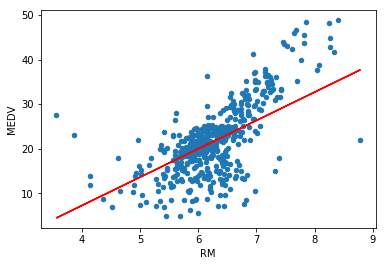

In [22]:
data.plot(kind='scatter', x="RM", y="MEDV")
plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, 'r')

CPU times: user 1min 48s, sys: 53.9 ms, total: 1min 48s
Wall time: 54.3 s


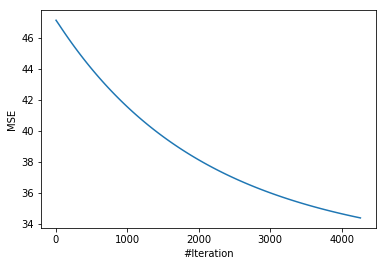

In [60]:
%time plot_cost_function(X, y, GDRegressor, max_iters=4300, eta0=0.03)

In [61]:
X_scaled = z_scaler(X)
y_scaled = z_scaler(y)

CPU times: user 2.68 s, sys: 0 ns, total: 2.68 s
Wall time: 1.38 s


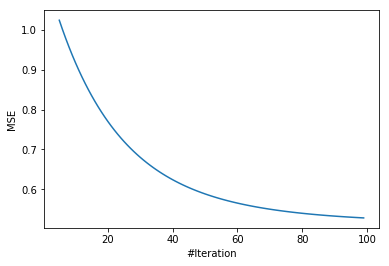

In [68]:
%time plot_cost_function(X_scaled, y_scaled, GDRegressor, max_iters=100, eta0=0.03)

Итог: MSE = 5.887;
      R^2 = 0.514